In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [3]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC

In [4]:
# Check versions of libraries

print("Python: {}".format(sys.version))
print("pandas: {}".format(pd.__version__))
print("numpy: {}".format(np.__version__))
print("seaborn: {}".format(sns.__version__))
print("matplotlib: {}".format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
pandas: 1.0.1
numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


In [5]:
# Load dataset
data = pd.read_csv('./data/data.csv')
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [6]:
# Dataset summary
print("Dataset dimensions: {}".format(data.shape))

Dataset dimensions: (150, 5)


In [7]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
# Splitting data into train and tet subjects
train, test = train_test_split(data, test_size = 0.4, stratify = data["species"], random_state = 69)

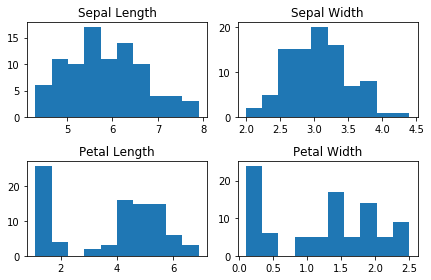

In [11]:
# Histogram
n_bins = 10
fig, axs = plt.subplots(2,2)
axs[0,0].hist(train["sepal_length"], bins = n_bins)
axs[0,0].set_title("Sepal Length")
axs[0,1].hist(train["sepal_width"], bins = n_bins)
axs[0,1].set_title("Sepal Width")
axs[1,0].hist(train["petal_length"], bins = n_bins)
axs[1,0].set_title("Petal Length")
axs[1,1].hist(train["petal_width"], bins = n_bins)
axs[1,1].set_title("Petal Width")
fig.tight_layout()

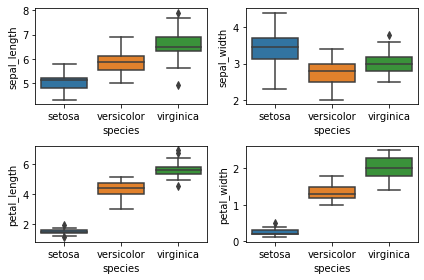

In [12]:
# Box and whiskey plots

fig, axs = plt.subplots(2,2)
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
species = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = species, ax = axs[0,0])
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = species, ax = axs[0,1])
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = species, ax = axs[1,0])
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = species, ax = axs[1,1])
fig.tight_layout()

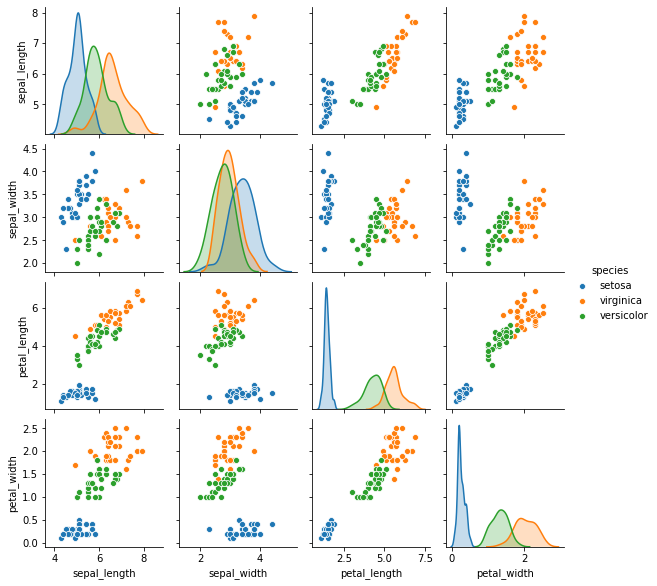

In [13]:
# Scatterplot matrix
sns.pairplot(train, hue="species", height = 2)
fig.tight_layout()

In [14]:
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
x_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [15]:
# KNN model

mod_knn = KNeighborsClassifier(n_neighbors=5)
mod_knn.fit(x_train, y_train)
knn_prediction = mod_knn.predict(x_test)
print("Accuracy of KNN Classifier where k=5: {:.3f}".format(metrics.accuracy_score(knn_prediction,y_test)))

Accuracy of KNN Classifier where k=5: 0.917


<Figure size 432x288 with 0 Axes>

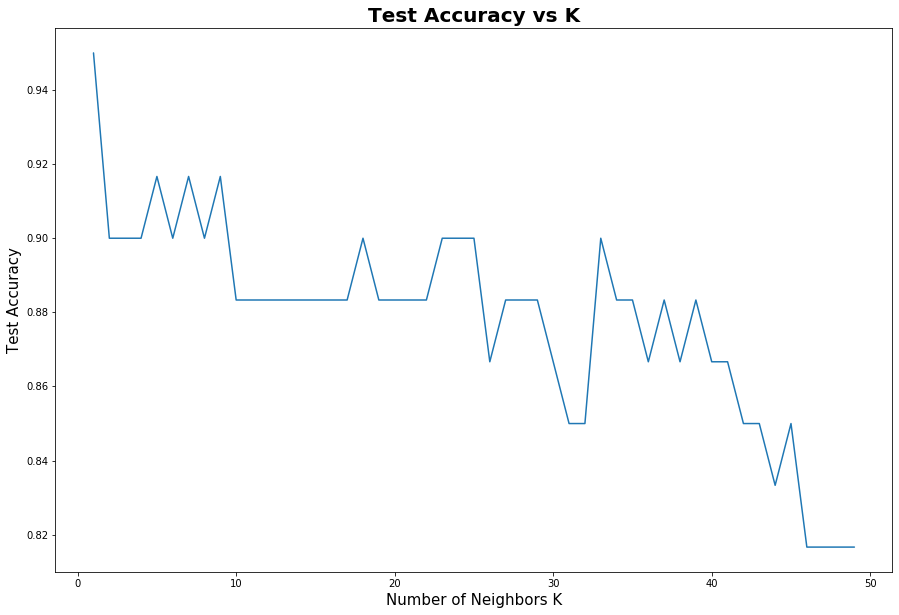

In [16]:
scores = []

for i in list(range(1,50)):
    mod_knn = KNeighborsClassifier(n_neighbors=i)
    mod_knn.fit(x_train, y_train)
    knn_prediction = mod_knn.predict(x_test)
    scores.append(metrics.accuracy_score(knn_prediction,y_test))

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Test Accuracy vs K', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(list(range(1,50)), scores)
plt.show()